In [1]:
import pandas as pd


In [3]:
#NEIGHBORING CITIES CONNECTION
df1=pd.read_json('https://portal.recoil.ise.utk.edu/api/rts/').iloc[:,1:]
df1

,rts_dms_mode,rts_dms_string,rts_reachable_cities,rts_granularity_level
0,Road,Albany NY CFS Area,New York NY-NJ-CT-PA (NY Part),Hubs
1,Road,Albany NY CFS Area,Rochester NY,Hubs
2,Road,Atlanta GA,Birmingham AL,Hubs
3,Road,Atlanta GA,Jacksonville FL-GA CFS Area (FL Part),Hubs
4,Road,Atlanta GA,Greenville SC,Hubs
...,...,...,...,...
212,Rail,Houston TX,Beaumont TX,Hubs
213,Rail,Milwaukee WI,Chicago IL-IN-WI (IL Part),Hubs
214,Rail,Milwaukee WI,Iowa,Hubs
215,Rail,Minneapolis-St. Paul MN-WI (MN Part),Iowa,Hubs


In [4]:
#DISTANCES PATHS SHORTEST PATH
df2=pd.read_json('https://portal.recoil.ise.utk.edu/api/rtg/').iloc[:,1:]
df2

,rtg_dms_mode,rtg_dms_orig_string,rtg_dms_dest_string,rtg_distance_miles,rtg_path,rtg_granularity_level,rtg_type
0,Road,Cleveland OH,Nashville TN,509.179484,"[(-81.69369399965134, 41.49966399976782), (-81...",Hubs,pc
1,Road,Cleveland OH,New Mexico,1524.149477,"[(-81.69369399965134, 41.49966399976782), (-81...",Hubs,pc
2,Road,Cleveland OH,New Orleans LA-MS (LA Part),1028.635797,"[(-81.69369399965134, 41.49966399976782), (-81...",Hubs,pc
3,Road,Cleveland OH,New York NY-NJ-CT-PA (CT Part),449.163446,"[(-81.69369399965134, 41.49966399976782), (-81...",Hubs,pc
4,Road,Cleveland OH,New York NY-NJ-CT-PA (NJ Part),433.294682,"[(-81.69369399965134, 41.49966399976782), (-81...",Hubs,pc
...,...,...,...,...,...,...,...
8169,Rail,Rochester NY,Rochester NY,0.000000,"[(-77.6307472125819, 43.224141412705066)]",Hubs,pc
8170,Rail,Rochester NY,Salt Lake City UT,2057.293812,"[(-77.6307472125819, 43.224141412705066), (-77...",Hubs,pc
8171,Rail,Rochester NY,San Francisco CA,2873.431097,"[(-77.6307472125819, 43.224141412705066), (-77...",Hubs,pc
8172,Rail,Sacramento CA,Jacksonville FL-GA CFS Area (FL Part),2856.323161,"[(-121.47876347635706, 38.58614737057163), (-1...",Hubs,pc


In [5]:
# Performing the join
merged_df = pd.merge(df1, df2, 
                     right_on=['rtg_dms_mode', 'rtg_dms_orig_string', 'rtg_dms_dest_string'],
                     left_on=['rts_dms_mode', 'rts_dms_string', 'rts_reachable_cities'], 
                     how='left')



In [6]:
# Display the result: RTS: routes
merged_df[['rts_dms_mode', 'rts_dms_string', 'rts_reachable_cities', 'rtg_distance_miles', 'rtg_path']]

,rts_dms_mode,rts_dms_string,rts_reachable_cities,rtg_distance_miles,rtg_path
0,Road,Albany NY CFS Area,New York NY-NJ-CT-PA (NY Part),131.963505,"[(-73.75549200013072, 42.651149999643), (-73.7..."
1,Road,Albany NY CFS Area,Rochester NY,214.253805,"[(-73.75549200013072, 42.651149999643), (-73.7..."
2,Road,Atlanta GA,Birmingham AL,142.923155,"[(-84.39005699965129, 33.75445199962218), (-84..."
3,Road,Atlanta GA,Jacksonville FL-GA CFS Area (FL Part),308.575063,"[(-84.39005699965129, 33.75445199962218), (-84..."
4,Road,Atlanta GA,Greenville SC,144.411313,"[(-84.39005699965129, 33.75445199962218), (-84..."
...,...,...,...,...,...
212,Rail,Houston TX,Beaumont TX,84.478880,"[(-95.36907952212782, 29.768048962678417), (-9..."
213,Rail,Milwaukee WI,Chicago IL-IN-WI (IL Part),115.581680,"[(-87.92280170266943, 43.03401038862175), (-87..."
214,Rail,Milwaukee WI,Iowa,390.332393,"[(-87.92280170266943, 43.03401038862175), (-87..."
215,Rail,Minneapolis-St. Paul MN-WI (MN Part),Iowa,367.017778,"[(-93.21331955015188, 44.91582239922749), (-93..."


In [7]:
# merged_df.to_csv('rts.csv')

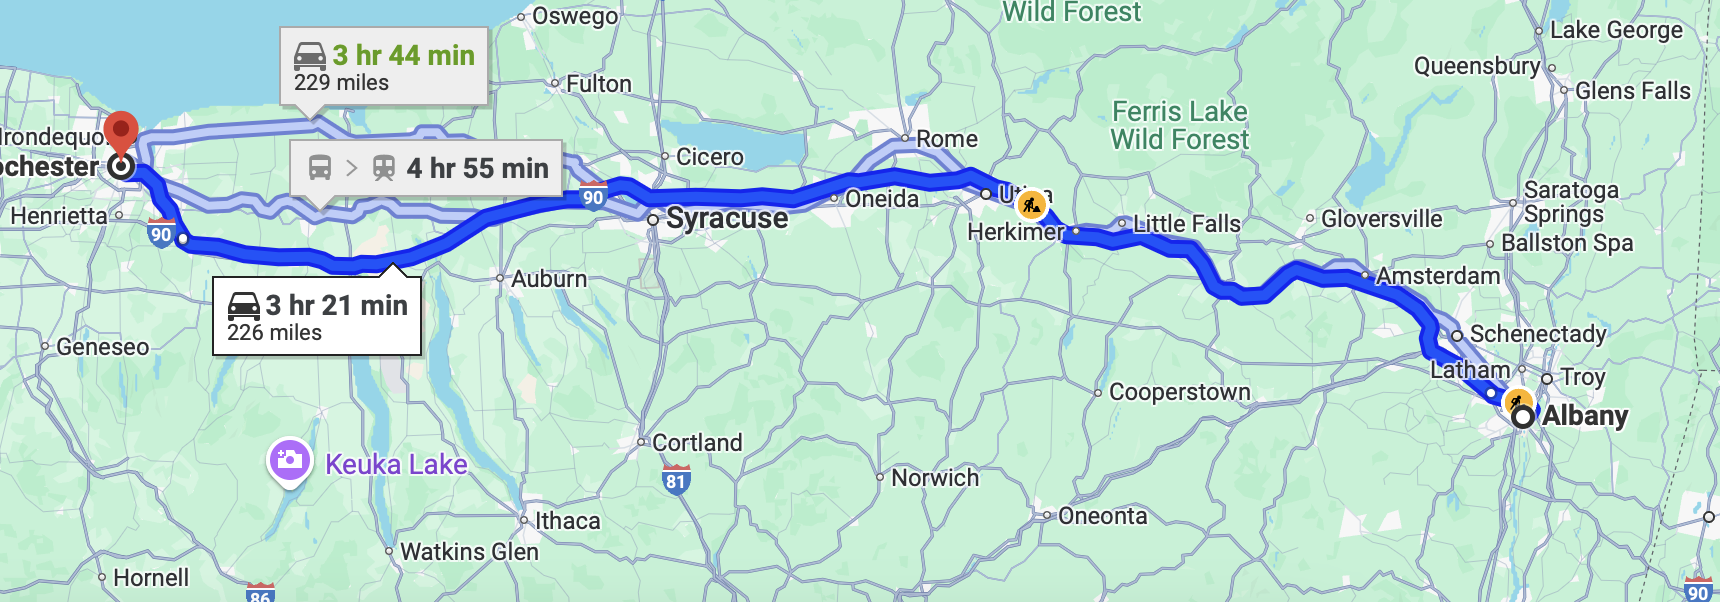

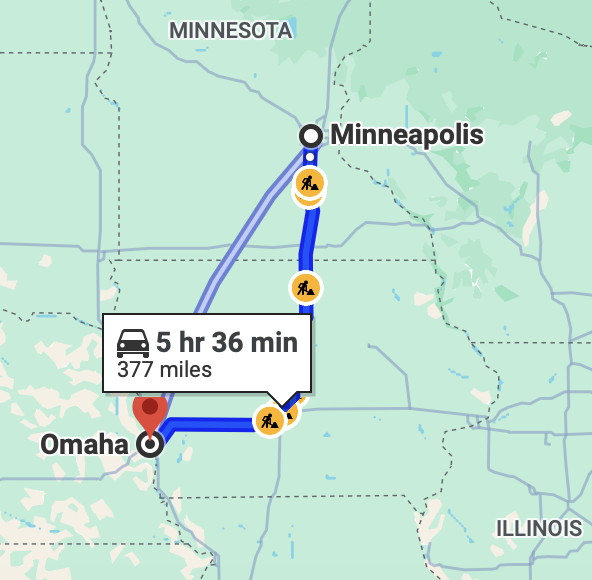